# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 5: NN4: Rozwiązywanie zadania klasyfikacji (1 tydzień, 2 punkty)

Zaimplementować funkcję softmax dla warstwy wyjściowej sieci neuronowej. Sprawdzić szybkość i
skuteczność w wariancie, gdy sieć używa funkcji softmax na ostatniej warstwie i gdy jest użyta zwykła
funkcja aktywacji. 

**Softmax wymaga też odpowiednich zmian w algorytmie uczenia, uwzględniających
pochodną fukcji.**

Przeprowadzić eksperymenty na zbiorach (w nawiasach wymagana wartość F-measure na 2 punkty):
- rings3-regular (F-measure: 0.75),
- easy (F-measure: 0.99),
- xor3 (F-measure: 0.97).

#### TODO:

- ~~implement softmax with derivative~~
- ~~compare training speed and accuracy with and without softmax at the last layer~~


In [1]:
import MultiLayerPerceptron as mlp
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def plot_good_vs_bad_predictions(network, x_test, y_test):
    pred_class = np.argmax(network.predict(x_test), axis=1)
    real_class = np.array(y_test).argmax(axis=1)
    is_good_prediction = real_class == pred_class
    
    fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3,figsize=(12, 4))
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=real_class, ax=axes_1)
    axes_1.set_title("Real classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=pred_class, ax=axes_2)
    axes_2.set_title("Predicted classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=is_good_prediction, ax=axes_3)
    axes_3.set_title("Good vs Bad Predictions")
    plt.show()

## Dataset 1: rings3-regular

In [3]:
df_train = pd.read_csv('data/classification/rings3-regular-training.csv').sample(frac=1)
df_test = pd.read_csv('data/classification/rings3-regular-test.csv').sample(frac=1)
print(df_test.head())

# onehot encoding
x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

              x          y  c
1056  57.982442 -92.214836  2
1027 -55.979153 -73.526666  2
1143  39.838594  28.836396  0
1498  35.866143  30.098521  0
827    6.717067 -64.577880  1

Unique classes: [0 1]


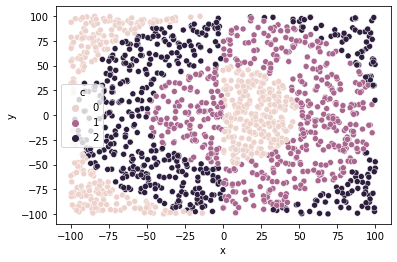

In [4]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [10]:
net1_1 = mlp.NeuralNetwork()
net1_1.add(mlp.Layer(2))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(3, activation_fun=mlp.ActivationTanh(), add_bias=False))

In [11]:
net1_1.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.01, batch_size=10, loss_function=mlp.LossMSE(f1_score=True))

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  MSE loss train:    0.799,  test:    0.893   |   F1 macro train:    0.223,  test:    0.194
Epoch:   11/100,  MSE loss train:     0.17,  test:    0.164   |   F1 macro train:    0.559,  test:    0.561
Epoch:   21/100,  MSE loss train:    0.158,  test:    0.152   |   F1 macro train:    0.685,  test:    0.667
Epoch:   31/100,  MSE loss train:    0.143,  test:    0.141   |   F1 macro train:    0.736,  test:    0.711
Epoch:   41/100,  MSE loss train:    0.129,  test:    0.131   |   F1 macro train:    0.775,  test:    0.755
Epoch:   51/100,  MSE loss train:    0.123,  test:    0.125   |   F1 macro train:    0.794,  test:    0.773
Epoch:   61/100,  MSE loss train:    0.118,  test:    0.119   |   F1 macro train:    0.809,  test:    0.784
Epoch:   71/100,  MSE loss train:    0.112,  test:    0.114   |   F1 macro train:    0.821,  test:    0.788
Epoch:   81/100,  MSE loss train:    0.108,  test:     0.11   |   F1 macro train:    0.824,  test:    0.798
Epoch:   91/100,  MSE loss t

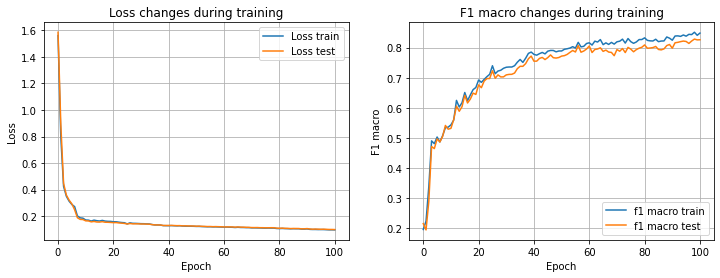

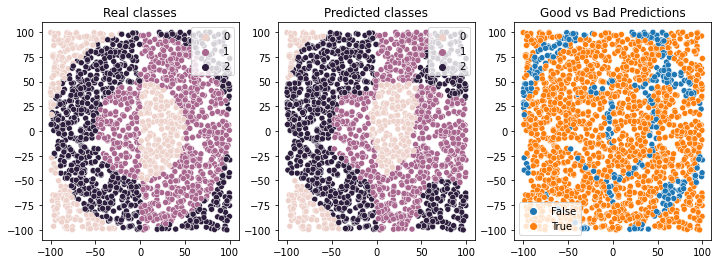

In [12]:
net1_1.plot_training_history()
plot_good_vs_bad_predictions(net1_1, x_test, y_test)

#### Model 2 - with softmax

In [13]:
net1_2 = mlp.NeuralNetwork()
net1_2.add(mlp.Layer(2))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(3, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [14]:
net1_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.01,\
            batch_size=10, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  CrossEntropy loss train:    1.009,  test:    0.919   |   F1 macro train:    0.311,  test:    0.331
Epoch:   11/100,  CrossEntropy loss train:    0.805,  test:    0.773   |   F1 macro train:    0.515,  test:    0.513
Epoch:   21/100,  CrossEntropy loss train:     0.64,  test:    0.619   |   F1 macro train:     0.73,  test:    0.715
Epoch:   31/100,  CrossEntropy loss train:    0.498,  test:     0.49   |   F1 macro train:    0.816,  test:    0.804
Epoch:   41/100,  CrossEntropy loss train:    0.413,  test:    0.412   |   F1 macro train:    0.842,  test:    0.827
Epoch:   51/100,  CrossEntropy loss train:    0.374,  test:    0.368   |   F1 macro train:     0.84,  test:    0.839
Epoch:   61/100,  CrossEntropy loss train:     0.35,  test:    0.341   |   F1 macro train:    0.842,  test:    0.842
Epoch:   71/100,  CrossEntropy loss train:    0.309,  test:     0.31   |   F1 macro train:     0.86,  test:    0.864
Epoch:   81/100,  CrossEntropy loss train:    0.305,  test:    0

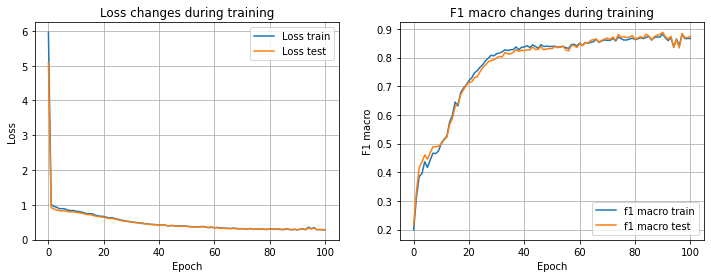

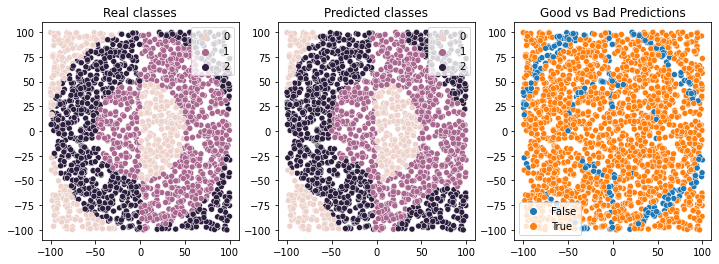

In [15]:
net1_2.plot_training_history()
plot_good_vs_bad_predictions(net1_2, x_test, y_test)

## Dataset 2: easy

In [3]:
df_train = pd.read_csv('data/classification/easy-training.csv')
df_test = pd.read_csv('data/classification/easy-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\n Unique classes: {np.unique(y_train)}")

           x          y      c
0  88.836312  35.105689   True
1   8.454690  57.210448  False
2 -57.221426  29.312467  False
3 -11.922723 -88.264355   True
4   8.885765   6.605795   True

 Unique classes: [0 1]


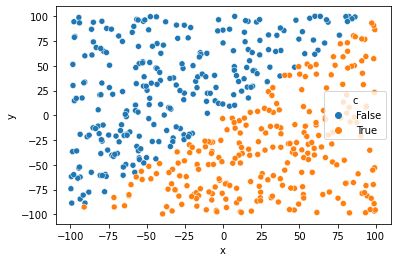

In [6]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [7]:
net2_1 = mlp.NeuralNetwork()
net2_1.add(mlp.Layer(2))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [8]:
net2_1.train(x_train, y_train, x_test, y_test, epochs=50, learning_rate=0.03, batch_size=10, loss_function=mlp.LossMSE(f1_score=True))

Epoch:    1/50,  MSE loss train:    0.265,  test:    0.266   |   F1 macro train:     0.33,  test:    0.313
Epoch:    6/50,  MSE loss train:    0.254,  test:    0.255   |   F1 macro train:    0.376,  test:    0.358
Epoch:   11/50,  MSE loss train:    0.246,  test:    0.247   |   F1 macro train:    0.638,  test:    0.626
Epoch:   16/50,  MSE loss train:    0.239,  test:    0.239   |   F1 macro train:    0.676,  test:    0.661
Epoch:   21/50,  MSE loss train:     0.23,  test:    0.231   |   F1 macro train:    0.741,  test:    0.739
Epoch:   26/50,  MSE loss train:    0.221,  test:    0.221   |   F1 macro train:    0.843,  test:    0.863
Epoch:   31/50,  MSE loss train:    0.208,  test:    0.209   |   F1 macro train:    0.851,  test:     0.88
Epoch:   36/50,  MSE loss train:    0.193,  test:    0.195   |   F1 macro train:    0.968,  test:    0.976
Epoch:   41/50,  MSE loss train:    0.176,  test:    0.178   |   F1 macro train:    0.976,  test:    0.984
Epoch:   46/50,  MSE loss train:    0

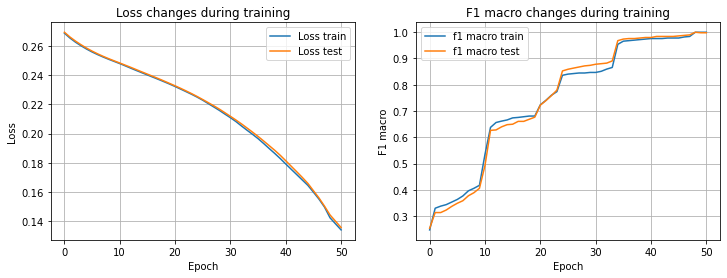

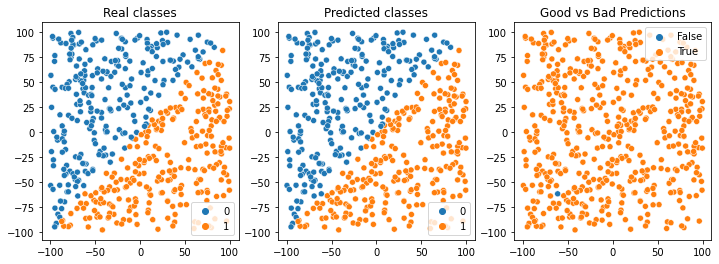

In [9]:
net2_1.plot_training_history()
plot_good_vs_bad_predictions(net2_1, x_test, y_test)

#### Model 2 - with softmax

In [10]:
net2_2 = mlp.NeuralNetwork()
net2_2.add(mlp.Layer(2))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [11]:
net2_2.train(x_train, y_train, x_test, y_test, epochs=50, learning_rate=0.03, batch_size=10, loss_function=mlp.LossCrossEntropy())

Epoch:    1/50,  CrossEntropy loss train:    2.391,  test:    1.845   |   F1 macro train:    0.922,  test:    0.938
Epoch:    6/50,  CrossEntropy loss train:    0.817,  test:    0.861   |   F1 macro train:    0.978,  test:    0.968
Epoch:   11/50,  CrossEntropy loss train:    0.547,  test:    0.456   |   F1 macro train:    0.986,  test:    0.992
Epoch:   16/50,  CrossEntropy loss train:    0.578,  test:    0.396   |   F1 macro train:    0.974,  test:     0.99
Epoch:   21/50,  CrossEntropy loss train:    0.787,  test:    0.525   |   F1 macro train:    0.974,  test:    0.988
Epoch:   26/50,  CrossEntropy loss train:      0.5,  test:    0.373   |   F1 macro train:    0.988,  test:     0.99
Epoch:   31/50,  CrossEntropy loss train:    0.693,  test:    0.473   |   F1 macro train:     0.98,  test:     0.99
Epoch:   36/50,  CrossEntropy loss train:    0.488,  test:     0.37   |   F1 macro train:     0.99,  test:    0.992
Epoch:   41/50,  CrossEntropy loss train:      0.4,  test:    0.286   | 

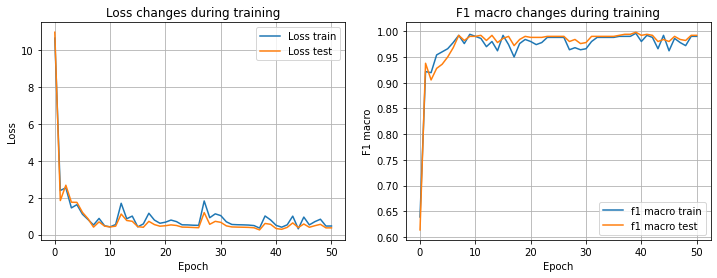

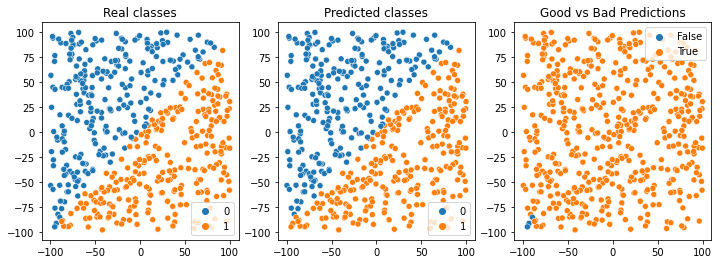

In [12]:
net2_2.plot_training_history()
plot_good_vs_bad_predictions(net2_2, x_test, y_test)

## Dataset 3: xor3

In [13]:
df_train = pd.read_csv('data/classification/xor3-training.csv')
df_test = pd.read_csv('data/classification/xor3-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

           x          y  c
0  36.973203 -55.586985  0
1  39.495972  78.216447  0
2  78.443533  77.156005  0
3   9.559384  -6.161679  0
4  42.216651  48.249953  0

Unique classes: [0 1]


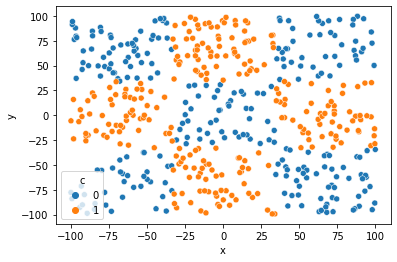

In [16]:
import seaborn as sns
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [19]:
net3_1 = mlp.NeuralNetwork()
net3_1.add(mlp.Layer(2))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(2, activation_fun=mlp.ActivationTanh(), add_bias=False))

In [20]:
net3_1.train(x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.03, batch_size=50, loss_function=mlp.LossMSE(f1_score=True))

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:308: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/1000,  MSE loss train:    1.474,  test:    1.642   |   F1 macro train:    0.333,  test:    0.292
Epoch:  101/1000,  MSE loss train:    0.109,  test:    0.146   |   F1 macro train:    0.865,  test:     0.79
Epoch:  201/1000,  MSE loss train:    0.098,  test:    0.133   |   F1 macro train:    0.874,  test:    0.805
Epoch:  301/1000,  MSE loss train:    0.094,  test:    0.128   |   F1 macro train:    0.874,  test:    0.815
Epoch:  401/1000,  MSE loss train:    0.092,  test:    0.126   |   F1 macro train:    0.886,  test:    0.809
Epoch:  501/1000,  MSE loss train:     0.09,  test:    0.125   |   F1 macro train:     0.88,  test:    0.817
Epoch:  601/1000,  MSE loss train:    0.088,  test:    0.123   |   F1 macro train:    0.882,  test:    0.823
Epoch:  701/1000,  MSE loss train:    0.082,  test:    0.119   |   F1 macro train:    0.884,  test:    0.829
Epoch:  801/1000,  MSE loss train:    0.082,  test:    0.119   |   F1 macro train:    0.884,  test:    0.829
Epoch:  901/1000,  

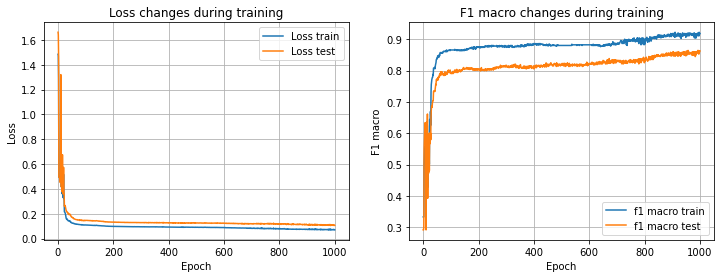

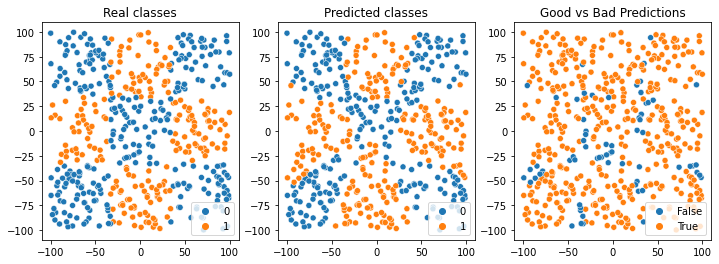

In [21]:
net3_1.plot_training_history()
plot_good_vs_bad_predictions(net3_1, x_test, y_test)

#### Model 2 - with softmax

In [22]:
net3_2 = mlp.NeuralNetwork()
net3_2.add(mlp.Layer(2))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [23]:
net3_2.train(x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.03,batch_size=50, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:308: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/1000,  CrossEntropy loss train:   13.793,  test:   16.238   |   F1 macro train:    0.333,  test:    0.292
Epoch:  101/1000,  CrossEntropy loss train:    6.827,  test:    8.234   |   F1 macro train:    0.859,  test:    0.796
Epoch:  201/1000,  CrossEntropy loss train:    5.149,  test:    7.026   |   F1 macro train:    0.861,  test:     0.77
Epoch:  301/1000,  CrossEntropy loss train:    4.678,  test:    6.392   |   F1 macro train:    0.873,  test:    0.786
Epoch:  401/1000,  CrossEntropy loss train:    4.599,  test:    6.398   |   F1 macro train:    0.881,  test:    0.796
Epoch:  501/1000,  CrossEntropy loss train:    4.009,  test:    5.898   |   F1 macro train:    0.893,  test:    0.816
Epoch:  601/1000,  CrossEntropy loss train:    3.939,  test:    5.581   |   F1 macro train:    0.881,  test:     0.83
Epoch:  701/1000,  CrossEntropy loss train:    3.609,  test:    5.437   |   F1 macro train:    0.897,  test:    0.839
Epoch:  801/1000,  CrossEntropy loss train:    3.518,  t

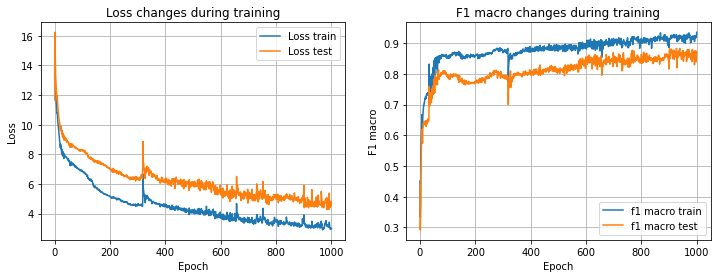

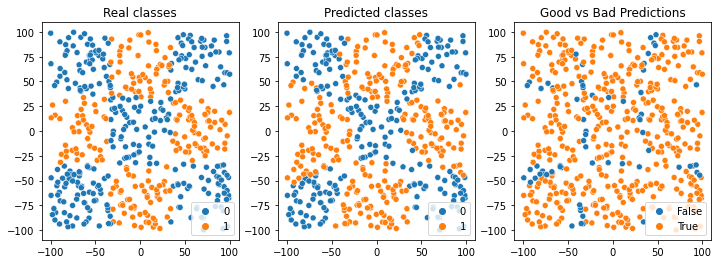

In [24]:
net3_2.plot_training_history()
plot_good_vs_bad_predictions(net3_2, x_test, y_test)

## Summary 

### Results

f1 macro for `rings3-regular` dataset:
- train:    0.867
- test:     0.875

f1 macro for the `easy` dataset:
- train:    1
- test:     0.998

f1 macro for the `xor3` dataset:
- train:    0.936
- test:     0.867


### Learning speed vs softmax

In general, I have observed that `softmax` is better than no `softmax` for the every dataset tested here, however it is not crucial to achieve high f1 scores.
